# Project Pipeline

1.   Dataset Reading/understading
2.   Dataset Creation and Visualisation
4.   Model Building & training


#1.Dataset Reading

Importing all the important libraries

In [25]:
# Import the pathlib library to work with file paths
import pathlib

# Import the TensorFlow library for machine learning and deep learning tasks
import tensorflow as tf

# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Import the numpy library for numerical computations
import numpy as np

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the os module for interacting with the operating system
import os

# Import the PIL (Python Imaging Library) for image processing tasks
import PIL

# Import the Keras module from TensorFlow for building and training neural networks
from tensorflow import keras

# Import specific classes and functions from Keras for building models and layers
from tensorflow.keras import layers

# Import the Sequential model from Keras for building sequential models
from tensorflow.keras.models import Sequential

# Import the Adam optimizer from Keras for optimization during model training
from tensorflow.keras.optimizers import Adam

# Import specific callback functions from Keras for model training callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Import the load_img function from Keras for loading images
from tensorflow.keras.preprocessing.image import load_img

In [27]:
# Defining the path for train and test images

# Define the path for the training dataset

data_dir_train = pathlib.Path('/Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train')

# Define the path for the test dataset

data_dir_test = pathlib.Path('/Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Test')


In [29]:
# Count the number of images in the training directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))

# Print the count of images in the training directory
print("Number of images in the training directory:", image_count_train)

# Count the number of images in the test directory
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))

# Print the count of images in the test directory
print("Number of images in the test directory:", image_count_test)

Number of images in the training directory: 2239
Number of images in the test directory: 118


# 2.Dataset creation , visualisation

Found 2239 files belonging to 9 classes.


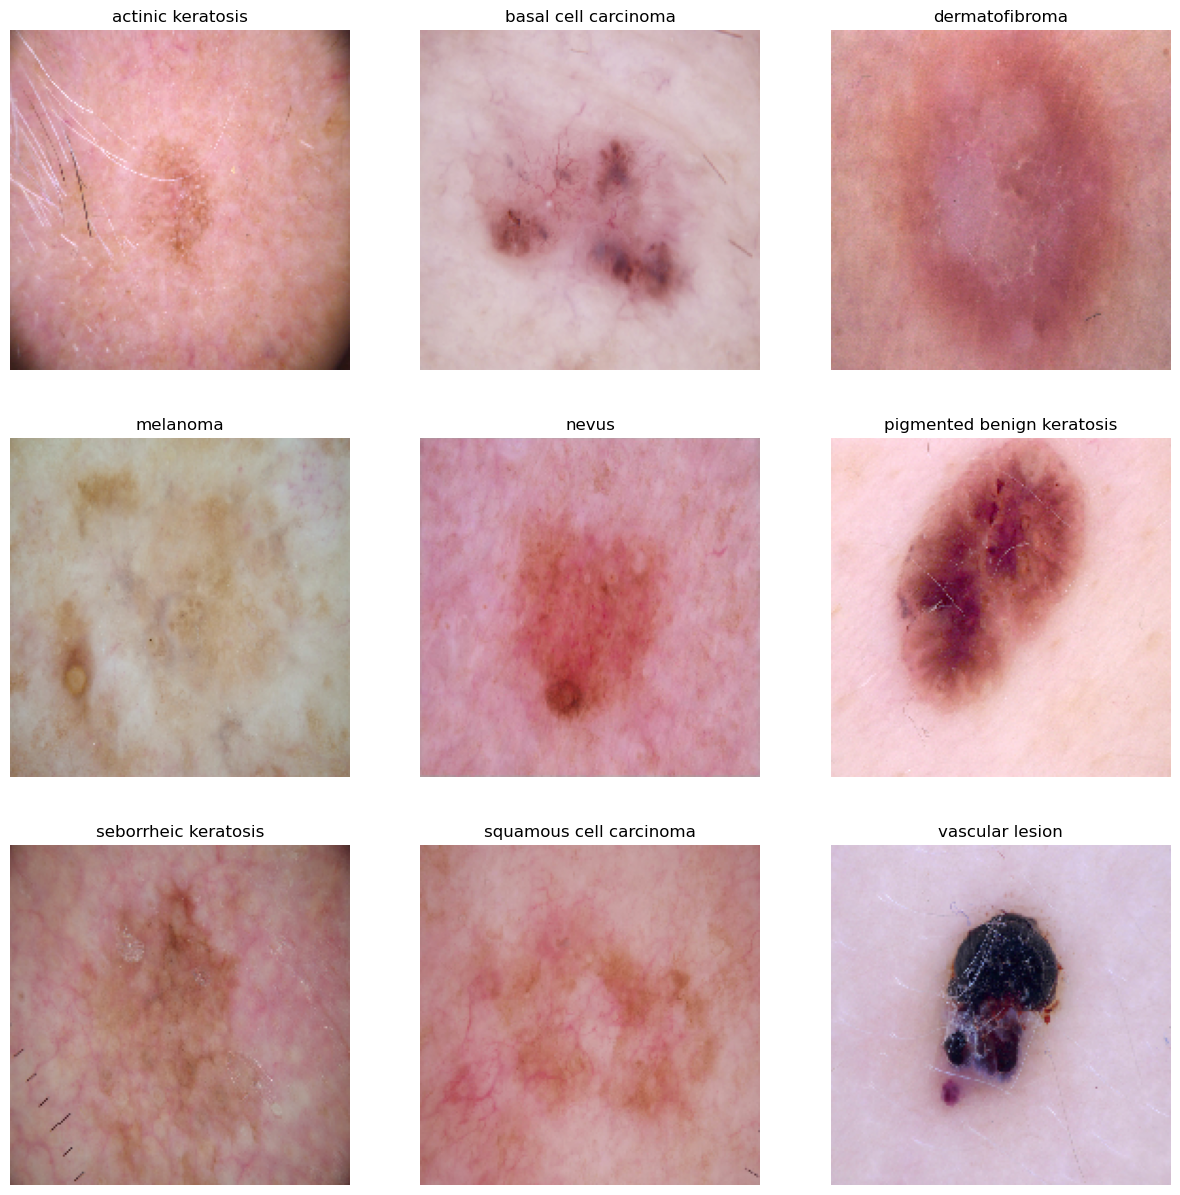

In [32]:
# Visualizing One Instance from Each Class in the Dataset

# Using image_dataset_from_directory() to create a dataset that yields batches of labeled images
# label_mode is set to 'categorical' for one-hot encoding of class labels
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=32, image_size=(180, 180), label_mode='categorical', seed=123
)

# Get the names of all the classes (skin cancer types)
class_names = image_dataset.class_names

# Dictionary to store image paths for each class
files_path_dict = {}

# Loop through each class to gather image paths
for c in class_names:
    files_path_dict[c] = list(map(lambda x: str(data_dir_train) + '/' + c + '/' + x, os.listdir(str(data_dir_train) + '/' + c)))

# Visualize an image from each class
plt.figure(figsize=(15, 15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3, 3, index)

    # Load and display the image
    plt.imshow(load_img(path_list[0], target_size=(180, 180)))
    plt.title(c)
    plt.axis("off")


In [33]:
# Define a function to count and analyze the distribution of images in each class

def class_distribution_count(directory):
    # Initialize a list to store image counts for each class
    count = []

    # Count the number of images in each class directory
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]))

    # Get the names of the classes (sub-directories)
    sub_directory = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

    # Create a DataFrame with class names and corresponding image counts
    df = pd.DataFrame(list(zip(sub_directory, count)), columns=['Class', 'No. of Images'])

    # Sort the DataFrame in ascending order of image counts
    df = df.sort_values(by='No. of Images', ascending=True)

    # Return the sorted DataFrame
    return df

# Call the function to get the class distribution and image count
class_distribution_df = class_distribution_count(data_dir_train)

# Display the DataFrame
class_distribution_df

,Class,No. of Images
7,seborrheic keratosis,77
8,dermatofibroma,95
4,actinic keratosis,114
6,vascular lesion,139
5,squamous cell carcinoma,181
2,nevus,357
3,basal cell carcinoma,376
0,melanoma,438
1,pigmented benign keratosis,462


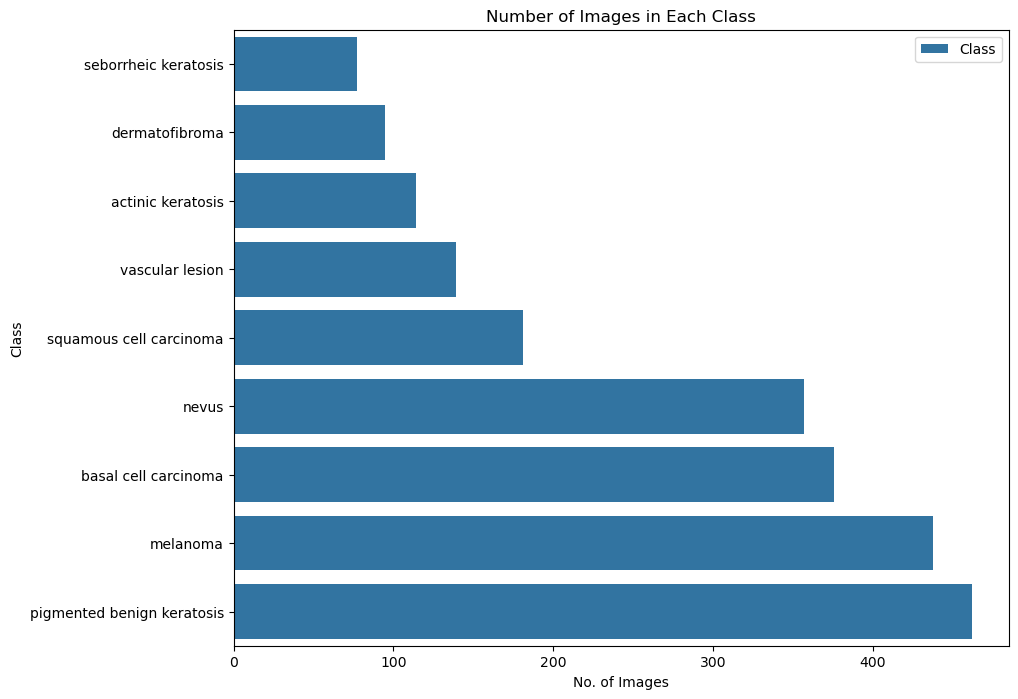

In [34]:
# Visualize the Number of Images in Each Class

# Import the seaborn library for data visualization
import seaborn as sns

# Set the size of the plot figure
plt.figure(figsize=(10, 8))

# Create a bar plot using seaborn
# x-axis: Number of Images
# y-axis: Class names
# Data source: df DataFrame
# Label: "Class"
sns.barplot(x="No. of Images", y="Class", data= class_distribution_df, label="Class")

# Add a title to the plot
plt.title("Number of Images in Each Class")

# Display the plot
plt.show()

# 2.1 Handling class imbalances

In [53]:
# Install Augmentor library
!pip install -q Augmentor

# Define the path to the training dataset
path_to_training_dataset = '/Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train'

# Import the necessary libraries
import Augmentor
import os

# Loop through each class and perform data augmentation
for i in class_names:
    # Construct the full path for the current class
    class_path = os.path.join(path_to_training_dataset, i)

    # Check if the directory exists
    if not os.path.exists(class_path):
        print(f"Directory does not exist: {class_path}")
        continue

    # Create an Augmentor pipeline for the current class
    p = Augmentor.Pipeline(class_path)

    # Apply rotation augmentation with specified parameters
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Generate and save 500 augmented samples for each class
    p.sample(500)  # Adding 500 samples per class to ensure class balance


Initialised with 114 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1506CFE90>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x150D04650>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15053B530>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 357 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x722 at 0x1


Initialised with 462 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 77 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x150BCE000>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1506CFB60>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/lytranbaominh/Downloads/Melanoma-detection-main/dataset/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


In [55]:
# Count the Total Number of Augmented Images Generated by Augmentor

# Count the number of image files in the 'output' subdirectories of each class
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))

# Print the total count of augmented images
print("Total number of augmented images:", image_count_train)

Total number of augmented images: 4500


# 3.Model Building & training

In [58]:
#Model Building

# Create a Training Dataset

# Use image_dataset_from_directory() to create a training dataset from the training directory
# Batch size: 32 images per batch
# Image size: 180x180 pixels
# Label mode: 'categorical' for one-hot encoded class labels
# Seed: 123 for random shuffling consistency
# Subset: "training" to select the training subset of the dataset
# Validation split: 20% of the data is used for validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=32, image_size=(180, 180), label_mode='categorical',
    seed=123, subset="training", validation_split=0.2
)

# Note: With label_mode set to 'categorical', the labels are represented as a float32 tensor
# of shape (batch_size, num_classes), where each label is a one-hot encoding of the class index.

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [59]:
# Create a Validation Dataset

# Use image_dataset_from_directory() to create a validation dataset from the training directory
# Batch size: 32 images per batch
# Image size: 180x180 pixels
# Label mode: 'categorical' for one-hot encoded class labels
# Seed: 123 for random shuffling consistency
# Subset: "validation" to select the validation subset of the dataset
# Validation split: 20% of the data is used for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=32, image_size=(180, 180), label_mode='categorical',
    seed=123, subset="validation", validation_split=0.2
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [62]:
# Define the appropriate number of processes that are free for working using AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Cache the training dataset in memory after loading images from disk during the first epoch
# This helps improve data loading speed for subsequent epochs
train_ds = train_ds.cache()

# Shuffle the training dataset to introduce randomness during training
# and prevent the model from memorizing the order of examples
train_ds = train_ds.shuffle(1000)

# Prefetch data for training to overlap data preprocessing and model execution
# This can lead to better GPU utilization and overall training performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

# Cache the validation dataset in memory
# Caching the validation data can help improve evaluation speed
val_ds = val_ds.cache()

# Prefetch data for validation
# Similar to training, prefetching can enhance validation performance
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# 3.1 CNN Model Architecture

In [69]:
# Import necessary libraries
from tensorflow.keras import Sequential, layers

# CNN Model Architecture

# Sequential allows you to create models layer-by-layer
model = Sequential()

# Rescaling Layer: Scale input pixel values to the [0, 1] range
model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# First Convolutional layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout layer with 50% Fraction of the input units to drop
model.add(layers.Dropout(0.5))

# Flatten Layer: Convert multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())

# Dense Layer: Fully connected layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Dropout layer with 25% Fraction of the input units to drop
model.add(layers.Dropout(0.25))

# Dense Layer with softmax activation function
# Softmax scales logits into probabilities
model.add(layers.Dense(len(class_names), activation='softmax'))

# Display model summary
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Visualizing the Model Architecture

# Import the necessary function from TensorFlow Keras utilities
from tensorflow.keras.utils import plot_model

# Plot the model architecture and save it as an image file
# Set show_shapes=True to display the shapes of the input/output tensors in the plot
# Set show_layer_names=True to display the names of the layers in the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [75]:
# Compile the Model

# Compile the model with Adam optimization
# Adam is a stochastic gradient descent method with adaptive estimation of moments
# Categorical crossentropy is used as the loss function for multi-class classification
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

# ModelCheckpoint callback is used to save the model or weights at specific intervals
# It saves the best model based on the validation accuracy
# The saved model can be loaded later to continue training from the saved state
checkpoint = ModelCheckpoint("model.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# EarlyStopping callback is used to stop training when a monitored metric stops improving
# It helps prevent overfitting by stopping training when validation accuracy plateaus
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

# 3.2 epochs is 20

In [78]:
# Train the Model

# Set the number of training epochs
epochs = 20

# Train the model using the training dataset and validate on the validation dataset
# Use the ModelCheckpoint and EarlyStopping callbacks defined earlier
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint, earlystop])

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.2260 - loss: 2.0221
Epoch 1: val_accuracy improved from -inf to 0.39347, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 692ms/step - accuracy: 0.2264 - loss: 2.0212 - val_accuracy: 0.3935 - val_loss: 1.6054
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.3852 - loss: 1.6187
Epoch 2: val_accuracy improved from 0.39347 to 0.50037, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 116s 682ms/step - accuracy: 0.3854 - loss: 1.6183 - val_accuracy: 0.5004 - val_loss: 1.3639
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.4576 - loss: 1.4147
Epoch 3: val_accuracy improved from 0.50037 to 0.53526, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 125s 739ms/step - accuracy: 0.4577 - loss: 1.4145 - val_accuracy: 0.5353 - val_loss: 1.2202
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.5099 - loss: 1.3136
Epoch 4: val_accuracy improved from 0.53526 to 0.55828, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 711ms/step - accuracy: 0.5099 - loss: 1.3135 - val_accuracy: 0.5583 - val_loss: 1.1656
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.5577 - loss: 1.1861
Epoch 5: val_accuracy improved from 0.55828 to 0.59094, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 119s 703ms/step - accuracy: 0.5577 - loss: 1.1861 - val_accuracy: 0.5909 - val_loss: 1.0909
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.5825 - loss: 1.1098
Epoch 6: val_accuracy improved from 0.59094 to 0.62287, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 121s 717ms/step - accuracy: 0.5826 - loss: 1.1096 - val_accuracy: 0.6229 - val_loss: 1.0815
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.6329 - loss: 0.9732
Epoch 7: val_accuracy improved from 0.62287 to 0.65479, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 116s 688ms/step - accuracy: 0.6329 - loss: 0.9733 - val_accuracy: 0.6548 - val_loss: 0.9589
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.6460 - loss: 0.9539
Epoch 8: val_accuracy did not improve from 0.65479
169/169 ━━━━━━━━━━━━━━━━━━━━ 142s 836ms/step - accuracy: 0.6460 - loss: 0.9539 - val_accuracy: 0.6496 - val_loss: 0.9740
Epoch 9/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.6578 - loss: 0.9371
Epoch 9: val_accuracy improved from 0.65479 to 0.70973, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 121s 716ms/step - accuracy: 0.6579 - loss: 0.9368 - val_accuracy: 0.7097 - val_loss: 0.8589
Epoch 10/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.7163 - loss: 0.7440
Epoch 10: val_accuracy improved from 0.70973 to 0.71789, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 133s 786ms/step - accuracy: 0.7163 - loss: 0.7441 - val_accuracy: 0.7179 - val_loss: 0.8139
Epoch 11/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.7420 - loss: 0.6968
Epoch 11: val_accuracy improved from 0.71789 to 0.73422, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 148s 821ms/step - accuracy: 0.7419 - loss: 0.6969 - val_accuracy: 0.7342 - val_loss: 0.7741
Epoch 12/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7628 - loss: 0.6433
Epoch 12: val_accuracy improved from 0.73422 to 0.76689, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.7627 - loss: 0.6434 - val_accuracy: 0.7669 - val_loss: 0.7455
Epoch 13/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.7869 - loss: 0.5605
Epoch 13: val_accuracy improved from 0.76689 to 0.77951, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 146s 862ms/step - accuracy: 0.7869 - loss: 0.5607 - val_accuracy: 0.7795 - val_loss: 0.7081
Epoch 14/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.7941 - loss: 0.5590
Epoch 14: val_accuracy did not improve from 0.77951
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 776ms/step - accuracy: 0.7941 - loss: 0.5591 - val_accuracy: 0.7305 - val_loss: 0.7806
Epoch 15/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.7843 - loss: 0.5787
Epoch 15: val_accuracy did not improve from 0.77951
169/169 ━━━━━━━━━━━━━━━━━━━━ 141s 834ms/step - accuracy: 0.7844 - loss: 0.5786 - val_accuracy: 0.7743 - val_loss: 0.6669
Epoch 16/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.8190 - loss: 0.4881
Epoch 16: val_accuracy improved from 0.77951 to 0.80549, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 774ms/step - accuracy: 0.8190 - loss: 0.4882 - val_accuracy: 0.8055 - val_loss: 0.6588
Epoch 17/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.8346 - loss: 0.4609
Epoch 17: val_accuracy did not improve from 0.80549
169/169 ━━━━━━━━━━━━━━━━━━━━ 122s 720ms/step - accuracy: 0.8346 - loss: 0.4609 - val_accuracy: 0.7825 - val_loss: 0.7873
Epoch 18/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.8426 - loss: 0.4169
Epoch 18: val_accuracy did not improve from 0.80549
169/169 ━━━━━━━━━━━━━━━━━━━━ 121s 713ms/step - accuracy: 0.8426 - loss: 0.4169 - val_accuracy: 0.7944 - val_loss: 0.7813
Epoch 19/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.8507 - loss: 0.3956
Epoch 19: val_accuracy improved from 0.80549 to 0.81366, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.8506 - loss: 0.3958 - val_accuracy: 0.8137 - val_loss: 0.6767
Epoch 20/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.8368 - loss: 0.4299
Epoch 20: val_accuracy improved from 0.81366 to 0.81960, saving model to model.h5


169/169 ━━━━━━━━━━━━━━━━━━━━ 137s 807ms/step - accuracy: 0.8368 - loss: 0.4299 - val_accuracy: 0.8196 - val_loss: 0.6932


# 3.3 Plotting Training curves

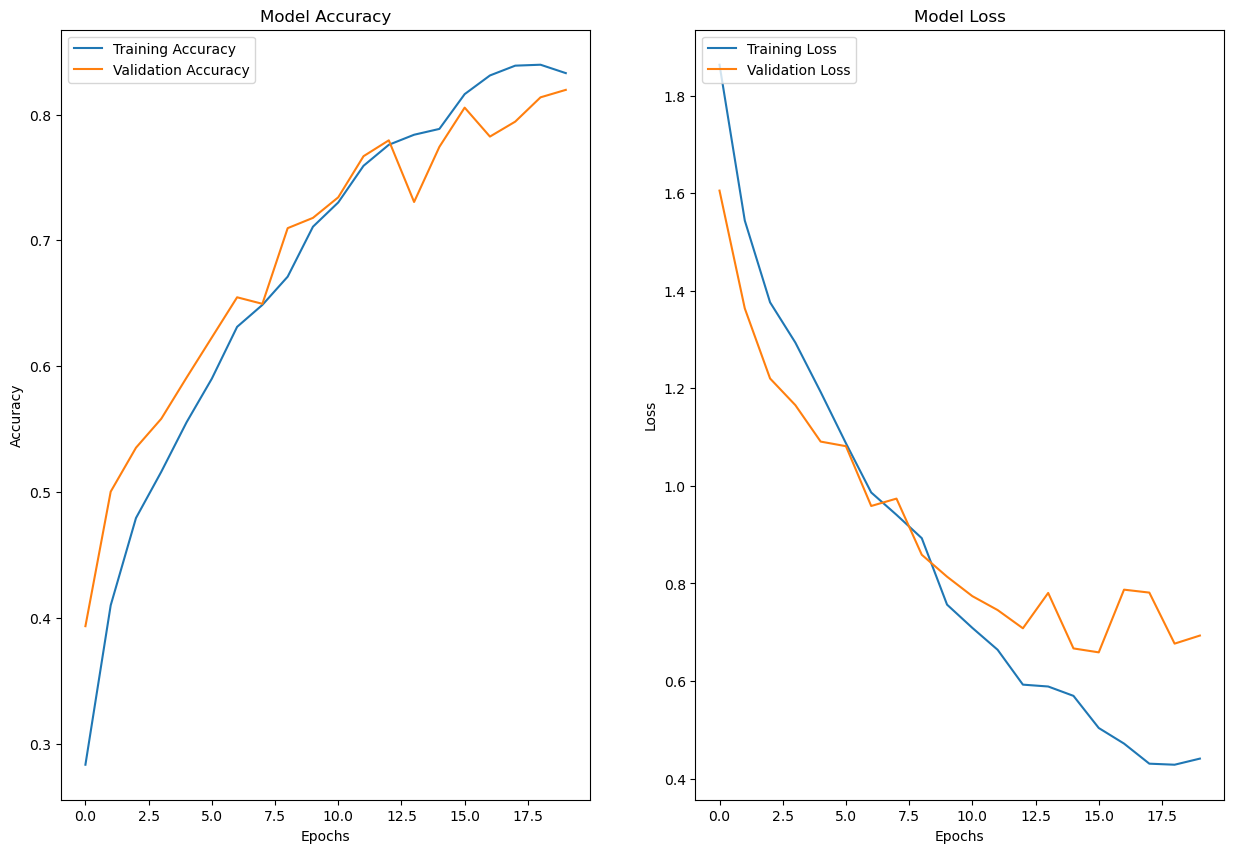

In [84]:
# Define the range of epochs based on the length of the training history
epochs_range = range(len(history.history['accuracy']))  # Use the length of the training history

# Create a figure with two subplots for accuracy and loss
plt.figure(figsize=(15, 10))

# Plot Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Display the plots
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


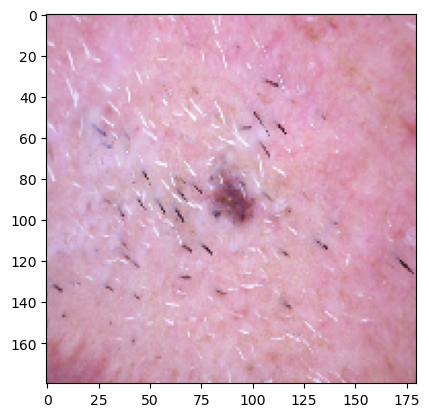

In [86]:
from glob import glob

# Construct the path to a test image
test_image_path = os.path.join(data_dir_test, class_names[1], '*')

# Get a list of all test images for the selected class
test_images = glob(test_image_path)

# Load the last test image in the list
test_image = load_img(test_images[-1], target_size=(180, 180, 3))

# Display the test image
plt.imshow(test_image)
plt.grid(False)

# Expand dimensions to match the input shape of the model
img = np.expand_dims(test_image, axis=0)

# Make predictions using the trained model
pred = model.predict(img)

# Get the index of the predicted class with the highest probability
pred = np.argmax(pred)

# Get the predicted class name
pred_class = class_names[pred]

# Print the actual and predicted class names
print("Actual Class: " + class_names[1])
print("Predicted Class: " + pred_class)